In [1]:
# Import functions for analysis
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# RAW DATA FILE

In [2]:
# Reading cvs file
df = pd.read_csv('duo.csv')

In [3]:
print("Shape:", df.shape)
df.head()

Shape: (124, 39)


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q12,Q13,Q13_5_TEXT,Q17,Q18,Q18_5_TEXT,Q19,Q19_5_TEXT,Q21,Q18.1
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How well does Duolingo help you when you make ...,Which Duolingo feature do you find most helpfu...,Which Duolingo feature do you find most helpfu...,"On a scale of 1-5, how effective do you think ...",What frustrates you the most about Free Duolin...,What frustrates you the most about Free Duolin...,What features would you be interested in: (Sel...,What features would you be interested in: (Sel...,Are there any User Interface (UI) improvements...,What is your email address? (Optional)
1,"{""ImportId"":""startDate"",""timeZone"":""America/Lo...","{""ImportId"":""endDate"",""timeZone"":""America/Los_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID12""}","{""ImportId"":""QID13""}","{""ImportId"":""QID13_5_TEXT""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID18_5_TEXT""}","{""ImportId"":""QID19""}","{""ImportId"":""QID19_5_TEXT""}","{""ImportId"":""QID21_TEXT""}","{""ImportId"":""QID25_TEXT""}"
2,2025-03-18 15:50:56,2025-03-18 15:51:38,Survey Preview,NaN,100,42,True,2025-03-18 15:51:38,R_1AZ4Ngn3WJxZO5b,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-18 20:17:44,2025-03-18 20:17:57,Survey Preview,NaN,100,13,True,2025-03-18 20:17:58,R_5HF8FmJgEUZ5MEE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-18 20:26:23,2025-03-18 20:37:47,Survey Preview,NaN,100,683,True,2025-03-18 20:37:48,R_7haxL3AZEDtBNZr,NaN,...,Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,4,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,Nah not really,viduniariyawansa@gmail.com


# DATA CLEANING

In [4]:
# Removing unnecessary columns 
df_duo = df.copy()

columns_to_drop = [
    'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
    'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
    'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
    'ExternalReference', 'LocationLatitude', 'LocationLongitude',
    'DistributionChannel', 'UserLanguage', 'Q18.1'
]

df_duo = df_duo.drop(columns = [col for col in columns_to_drop if col in df_duo.columns])

In [5]:
# Dropped first 4 rows (metadata + test runs) on [DATE]. 
# This cell has been disabled to avoid accidentally deleting real data.
#df_duo = df_duo.iloc[4:].reset_index(drop=True)

In [6]:
# Rename column names
df_duo = df_duo.rename(columns={
    'Q1': 'uses_duo',
    'Q2': 'free_or_premium',
    'Q2.1': 'age',
    'Q3': 'fluent_lang_num',
    'Q4': 'other_lang_learning_apps',
    'Q5': 'reason',
    'Q5_5_TEXT': 'reason_other',
    'QID6': 'frequency',
    'Q9': 'target_language(s)',
    'Q9_5_TEXT': 'target_language(s)_other',
    'Q10': 'consistency',
    'Q11': 'adapt_individual',
    'Q12': 'adapt_mistakes',
    'Q13': 'best_feature',
    'Q13_5_TEXT': 'best_feature_other',
    'Q17': 'adapt_effectiveness',
    'Q18': 'pain_point',
    'Q18_5_TEXT': 'pain_point_other',
    'Q19': 'potential_improvement',
    'Q19_5_TEXT': 'potential_improvement_other',
    'Q21': 'UI_improvements'
})

### OUR CLEAN DATA SET

In [7]:
df_duo.head()

,uses_duo,free_or_premium,age,fluent_lang_num,other_lang_learning_apps,reason,reason_other,frequency,target_language(s),target_language(s)_other,...,adapt_individual,adapt_mistakes,best_feature,best_feature_other,adapt_effectiveness,pain_point,pain_point_other,potential_improvement,potential_improvement_other,UI_improvements
0,Yes,Free Version,22,2,No,"Travel,Personal interests/Hobby",NaN,I have used it before but I don't use it anymore,Spanish,NaN,...,"No, it feels like a one-size-fits-all experience",Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,4,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,Nah not really
1,Yes,Free Version,20,2,No,Personal interests/Hobby,NaN,Rarely,French,NaN,...,"No, it feels like a one-size-fits-all experience",Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,3,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,NaN
2,Yes,Free Version,21,2,No,"Academic Purposes,Travel,Personal interests/Ho...",NaN,Daily,"French,Other:",English,...,"Yes, it adjusts well to my progress and mistakes",Very well – it gives targeted explanations and...,"Personalized lesson path (e.g., skill progress...",NaN,5,Repetitive exercises with no real explanations,NaN,AI-generated video explanations for tricky gra...,NaN,Babbel
3,Yes,Free Version,15,2,No,Personal interests/Hobby,NaN,I have used it before but I don't use it anymore,French,NaN,...,"No, it feels like a one-size-fits-all experience",Somewhat – it repeats exercises but doesn’t pr...,"Personalized lesson path (e.g., skill progress...",NaN,2,Repetitive exercises with no real explanations...,NaN,AI-generated video explanations for tricky gra...,NaN,When typing in an answer that could also be co...
4,Yes,Free Version,20,2,No,"Travel,Personal interests/Hobby",NaN,I have used it before but I don't use it anymore,"French,Other:",Korean,...,"Yes, it adjusts well to my progress and mistakes",Very well – it gives targeted explanations and...,"Personalized lesson path (e.g., skill progress...",NaN,4,Lack of real-world context in sentence examples,NaN,AI-generated video explanations for tricky gra...,NaN,NaN


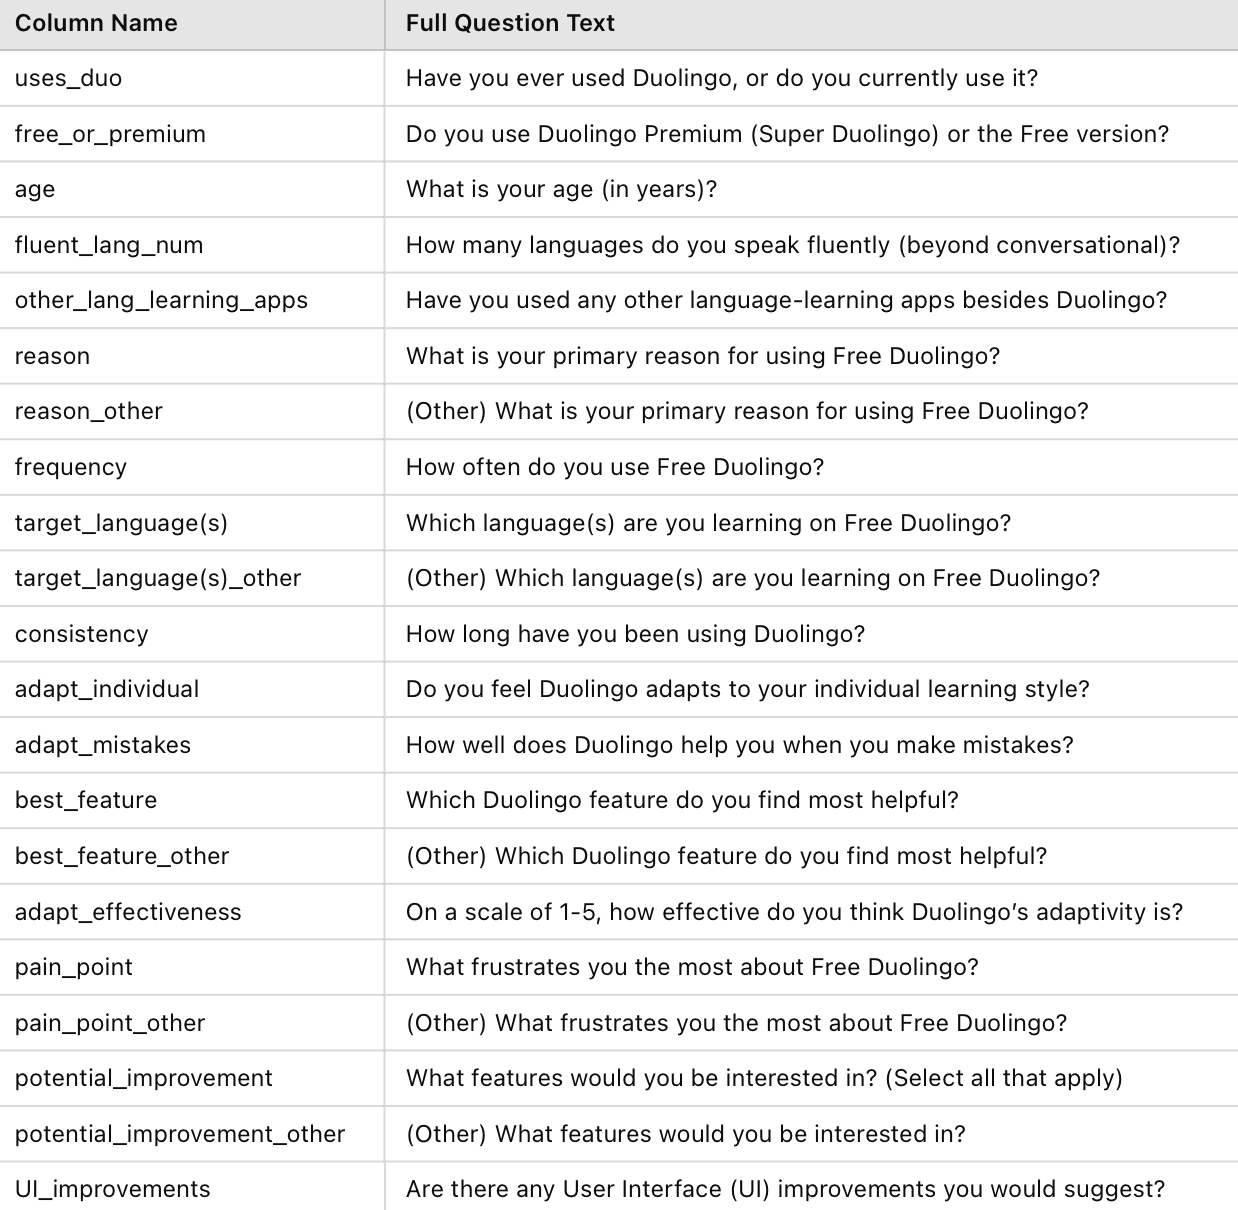

In [8]:
from IPython.display import Image, display

display(Image(filename='question_text.png', width=400))

# Exploratory Data Analysis

In [9]:
# Summary values
total_responses = len(df_duo)
yes_count = df_duo['uses_duo'].value_counts().get('Yes', 0)
no_count = df_duo['uses_duo'].value_counts().get('No', 0)
free_count = df_duo['free_or_premium'].value_counts().get('Free Version', 0)
premium_count = df_duo['free_or_premium'].value_counts().get('Premium Duolingo', 0)
nan_count = df_duo['free_or_premium'].isna().sum()

# Create a summary table
summary_df = pd.DataFrame({
    'Category': ['Total Responses', 'Yes (Uses Duolingo)', 'No (Doesn’t Use)', 
                 'Free Version Users', 'Premium Users',],
    'Count': [total_responses, yes_count, no_count, free_count, premium_count]
})

summary_df

,Category,Count
0,Total Responses,120
1,Yes (Uses Duolingo),94
2,No (Doesn’t Use),26
3,Free Version Users,80
4,Premium Users,14


In [10]:
# Limiting data analysis from here on to users that have said:
#     1. "Yes" to uses_duo &
#     2. "Free Version" to free_or_premium
df_duo_free = df_duo[
    (df_duo['uses_duo'] == 'Yes') &
    (df_duo['free_or_premium'] == 'Free Version')
].reset_index(drop=True)

## PHASE 1: BASIC EXPLORATION (FOUNDATIONAL EDA)

##### DEMOGRAPHIC ANALYSIS

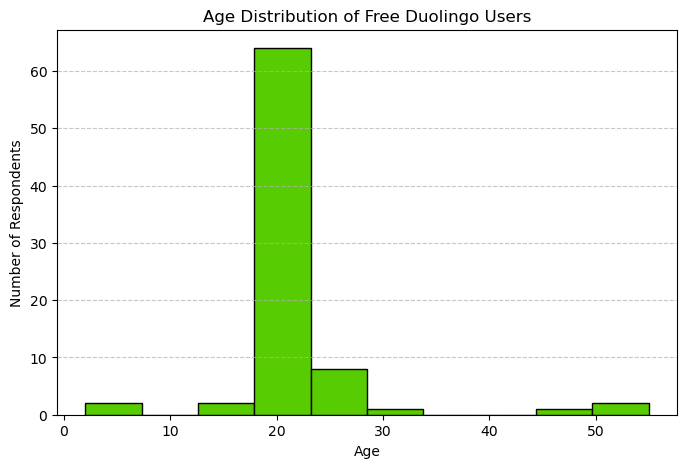

In [11]:
# Replace "18 almost 19" entry with 18
df_duo_free['age'] = df_duo_free['age'].replace('18 almost 19', 18)
# Then safely convert the column to integers
df_duo_free['age'] = df_duo_free['age'].astype(float)

# Drop missing or invalid age values, just in case
ages = df_duo_free['age'].dropna().astype(int)

plt.figure(figsize=(8, 5))
plt.hist(ages, bins=10, edgecolor='black', color='#58cc02')
plt.title('Age Distribution of Free Duolingo Users')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

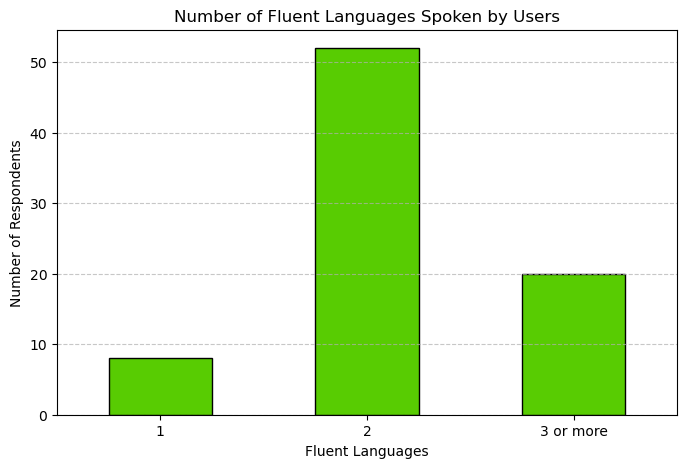

In [12]:
# Replace NaN in 'fluent_lang_num' with '3 or more'
df_duo_free['fluent_lang_num_filled'] = df_duo_free['fluent_lang_num'].fillna('3 or more')

# Convert any numeric-looking values to string for consistency
df_duo_free['fluent_lang_num_filled'] = df_duo_free['fluent_lang_num_filled'].replace({
    1.0: '1',
    2.0: '2',
    1: '1',
    2: '2',
    3: '3 or more',
    3.0: '3 or more'
})

# Count and order
fluent_counts = df_duo_free['fluent_lang_num_filled'].value_counts().reindex(['1', '2', '3 or more'])

# Plot

plt.figure(figsize=(8, 5))
fluent_counts.plot(kind='bar', color='#58cc02', edgecolor='black')

plt.title('Number of Fluent Languages Spoken by Users')
plt.xlabel('Fluent Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### USAGE PATTERN ANALYSIS

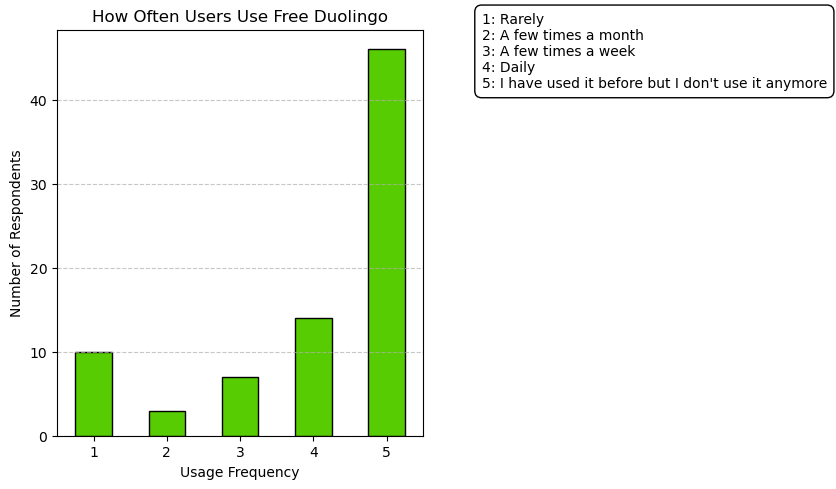

In [13]:
# Map long responses to numeric codes
frequency_map = {
    "Rarely": "1",
    "A few times a month": "2",
    "A few times a week": "3",
    "Daily": "4",
    "I have used it before but I don't use it anymore": "5"
}

# Apply mapping
df_duo_free['frequency_mapped'] = df_duo_free['frequency'].map(frequency_map)

# Count
frequency_counts = df_duo_free['frequency_mapped'].value_counts().reindex(['1', '2', '3', '4', '5'])

# Create reverse mapping for legend
legend_text = '\n'.join([
    f"{num}: {label}" for label, num in frequency_map.items()
])

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
frequency_counts.plot(kind='bar', color='#58cc02', edgecolor='black')

plt.title('How Often Users Use Free Duolingo')
plt.xlabel('Usage Frequency')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend as text box
plt.text(
    5.3,  # x-position (adjust if needed)
    max(frequency_counts) * 0.9,  # y-position
    legend_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()


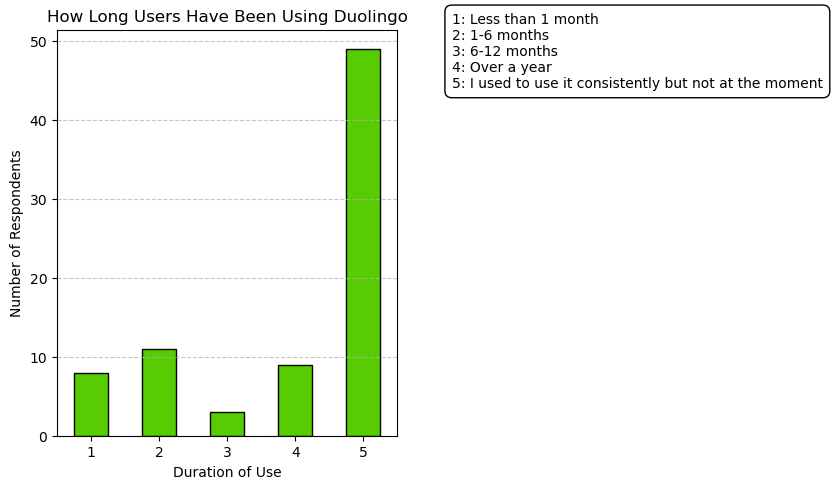

In [14]:
consistency_map = {
    "Less than 1 month": "1",
    "1-6 months": "2",
    "6-12 months": "3",
    "Over a year": "4",
    "I used to use it consistently but not at the moment": "5"
}

# Apply mapping
df_duo_free['consistency_mapped'] = df_duo_free['consistency'].map(consistency_map)

# Count in correct order
consistency_counts = df_duo_free['consistency_mapped'].value_counts().reindex(['1', '2', '3', '4', '5'])

# Reverse mapping for legend text
legend_text = '\n'.join([f"{num}: {label}" for label, num in consistency_map.items()])

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
consistency_counts.plot(kind='bar', color='#58cc02', edgecolor='black')

plt.title('How Long Users Have Been Using Duolingo')
plt.xlabel('Duration of Use')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend box
plt.text(
    5.3,
    max(consistency_counts) * 0.9,
    legend_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()


##### MOTIVATION ANALYSIS

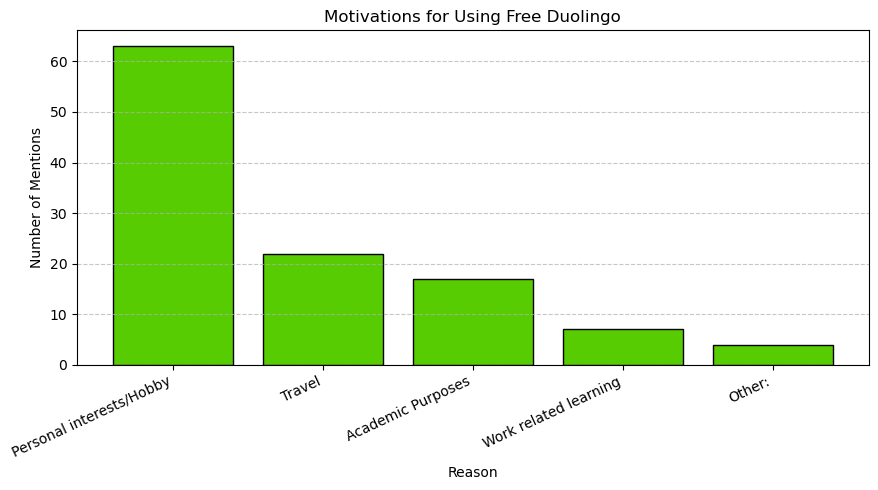

In [15]:
# Drop NaN responses
reason_series = df_duo_free['reason'].dropna()

# Step 1: Flatten all comma-separated entries
all_reasons = []
for entry in reason_series:
    parts = [r.strip() for r in entry.split(',')]  # split & remove extra spaces
    all_reasons.extend(parts)

# Step 2: Count frequency of each individual reason
reason_counts = Counter(all_reasons)

# Step 3: Convert to DataFrame for plotting
reason_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot
plt.figure(figsize=(9, 5))
plt.bar(reason_df['Reason'], reason_df['Count'], color='#58cc02', edgecolor='black')
plt.title('Motivations for Using Free Duolingo')
plt.xlabel('Reason')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## PHASE 2: CORE PERSONALIZATION EXPLORATION